<p>Some notes from 9/26 lecture</p>

<ol>
<li><p>Numerically see that</p>
</li>
</ol>


$$
E_n(x) = \int_1^\infty (e^{xt} t^n)^{-1} dt
$$


<p>can be inductively defined with $n E_{n+1}(x)  =  e^{-x} - x E_n(x)$.</p>

<p>Do so for x = 1/2, N = 20:</p>

In [ ]:
x, N = 1/2, 20
using QuadGK
En(x, n) = quadgk(t -> 1/ (exp(x*t) * t^n), 1, Inf)
En(x, N)

(0.031061217393630977, 1.4870639674644314e-10)

<p>Where as</p>

In [ ]:

enx = e1 = En(x, 1)[1]

for n = 1:(N-1)
  enx = 1/n * (exp(-x) - x * enx)
end
enx

0.031061217393630984

<ol start="2">
<li><p>We had three things to check with Newton's method:</p>
</li>
</ol>

<p><em>Theorem 1</em> If $\delta$ is small enough so that $\delta c(\delta) < \lambda < 1$ then convergence is quadratic if we start in $B(r,\delta)$.</p>

<p><em>Theorem 2</em> If $f$ is concave up and increasing then convergence in guaranteed – though it may be slow</p>

<p><em>Theorem 3</em> If $g(x) = f(x)^k$, where $f(x)$ has a simple root at $r$, then $x_{n+1} = x_n - (1/k) f(x_n)/f'(x_n) = x_n - g(x_n)/g'(x_n)$ will have <em>linear</em> convergence.</p>

<h2>number 1</h2>

<p>Let's check:</p>

<p>First, we use the Roots pacakge</p>

In [ ]:
using Roots, SymPy

<p>Now, let $f(x) = 1/x - q$ where $q$ is in $[1/2,1]$ and take $x_0$ to be $x_0=48/17 - 32/17 \cdot q$. Fact $e_0 = x_0-r \leq 2/17$. Then</p>

In [ ]:
@vars x q
diff(1/x - q, x)  # smallest when x = 1 or min(f'(y)) = 1

<p>And</p>

In [ ]:
diff(1/x -1, x, x) # f'' largest at x = 1/2 or max(f''(z)) = 16

<p>So $c(\delta) = 1/2 \cdot 16 / 1 = 8$ and if $\delta = 2/17$ we have $2/17 \cdot 8 \leq 16/17 < 1$.</p>

<p>Looking with Newton's method ($x = 2x - qx^2$) we have:</p>

In [ ]:
q = .8; r = 1/q
x0 = 48/17 - 32/17 * q
x1 = 2x0 - q*x0^2
x2 = 2x1 - q*x1^2
x3 = 2x2 - q*x2^2
x4 = 2x3 - q*x3^2
xs = [x0, x1, x2, x3, x4]
es = xs .- r
[xs es]

5×2 Array{Float64,2}:
 1.31765   0.0676471  
 1.24634  -0.0036609  
 1.24999  -1.07217e-5 
 1.25     -9.19649e-11
 1.25     -2.22045e-16

<p>And we have:</p>

In [ ]:
es[2:end] ./ es[1:end-1].^2

4-element Array{Float64,1}:
     -0.8     
     -0.8     
     -0.800001
 -26254.0     

<p>(What happened at the end?)</p>

<h2>2</h2>

<p>The function $f(x) = x^20 -1$ is – for $x > 0$ increasing and concave up. So if we start at $x > 0$ we are guaranteed to converge to the root at 1. But not necessarily is it quadratic:</p>

In [ ]:
f(x) = x^20 - 1
fp(x) = 20*x^19
x = 1/2
xs = [x]
while abs(f(x)) > 1e-15
  x = x - f(x)/fp(x)
  push!(xs, x)
end

<p>How many steps?</p>

In [ ]:
length(xs)

205

<p>The errors are</p>

In [ ]:
es = xs .- 1
es[2:end] ./ es[1:end-1]  

204-element Array{Float64,1}:
 -52427.8       
      0.949998  
      0.949998  
      0.949998  
      0.949998  
      0.949998  
      0.949998  
      0.949997  
      0.949997  
      0.949997  
      0.949997  
      0.949997  
      0.949997  
      0.949996  
      0.949996  
      0.949996  
      0.949996  
      0.949996  
      0.949995  
      0.949995  
      0.949995  
      0.949995  
      0.949994  
      0.949994  
      0.949994  
      0.949993  
      0.949993  
      0.949993  
      0.949992  
      0.949992  
      0.949992  
      0.949991  
      0.949991  
      0.94999   
      0.94999   
      0.949989  
      0.949989  
      0.949988  
      0.949987  
      0.949987  
      0.949986  
      0.949985  
      0.949984  
      0.949984  
      0.949983  
      0.949982  
      0.949981  
      0.94998   
      0.949979  
      0.949978  
      0.949976  
      0.949975  
      0.949974  
      0.949973  
      0.949971  
      0.94997   
      0.949968  
 

<p>Since we see $e_{n+1} <= \lambda e_{n}$ with $\lambda < 1$, this is <em>linear</em> convergence.</p>

<p>Question how small is $\delta$ for <em>quadratic</em> convergence?</p>

<p>(Extra credit – 5 pts on an exam, computer proof okay)</p>

<h2>3</h2>

<p>The root of $f(x) = x^5 - x -1$ can be found with Newton's method. It is near 1:</p>

In [ ]:
f(x) = x^5 - x - 1
fp(x) = 5x^4 - 1
x0 = Roots.newton(f, fp, 1)  # 6 steps

1.1673039782614187

<p>How many steps to solve $g(x) = f(x)^5$?</p>

In [ ]:
x = 1.0
xs = [x]
while abs(f(x)) > 1e-14
  x = x - (1/5) * f(x)/fp(x)   # x - 1/k * f(x)/fp(x)
  push!(xs, x)
end

<p>Many!</p>

In [ ]:
length(xs)

146

In [ ]:
es = xs .- x0
es[2:end] ./ es[1:end-1]  # linear

145-element Array{Float64,1}:
 0.701143
 0.740195
 0.759176
 0.770586
 0.778142
 0.783433
 0.787272
 0.790127
 0.792287
 0.793943
 0.795224
 0.796222
 0.797005
 0.797621
 0.798107
 0.798493
 0.798798
 0.799041
 0.799235
 0.799389
 0.799512
 0.79961 
 0.799688
 0.799751
 0.799801
 0.799841
 0.799873
 0.799898
 0.799919
 0.799935
 0.799948
 0.799958
 0.799967
 0.799973
 0.799979
 0.799983
 0.799986
 0.799989
 0.799991
 0.799993
 0.799994
 0.799996
 0.799996
 0.799997
 0.799998
 0.799998
 0.799999
 0.799999
 0.799999
 0.799999
 0.799999
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.8     
 0.799999
 0.800001
 0.799999
 0.799999
 0.799999


<h2>Shape</h2>

<p>The condition</p>


$$
e_{n+1} = \frac{1}{2}\frac{f''(\xi)}{f(x_n)} e_n^2 = C_n(\xi) e_n^2
$$


<p>is a good bound <em>except</em> when the bound $C_n$ blows up or $e_0$ is <em>not</em> small, leading to these things to watch out for:</p>

<ul>
<li><p>the initial guess is far from the answer. Here is an illustration</p>
</li>
</ul>

In [ ]:
function show_newton(f, x0, k=10, a=-Inf, b=Inf)
  xs = [float(x0)]
  ctr = 0
  while abs(f(x0)) >= x0 * 100 * eps()
    x0 = x0 - f(x0)/D(f)(x0)
    push!(xs, x0)
	ctr = ctr + 1
	ctr > k && break
  end
  a == -Inf && (a = minimum(xs))
  b == Inf && (b = maximum(xs))

  p = plot(f, a, b, legend=false, linewidth=5)
  plot!(zero)
  for i in 1:length(xs)-1
    plot!(p, [xs[i], xs[i], xs[i+1]], [0, f(xs[i]), 0], color=:blue)
  end
  p
end

show_newton (generic function with 4 methods)

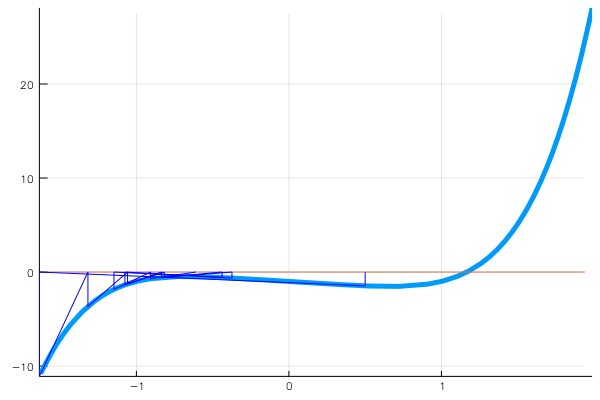

In [ ]:
show_newton(x -> x^5 - x - 1, .5, 10, -Inf, 2)

<p>(Not the hump causes a trap)</p>

<ul>
<li><p>Second derivative is not defined or blows up:</p>
</li>
</ul>

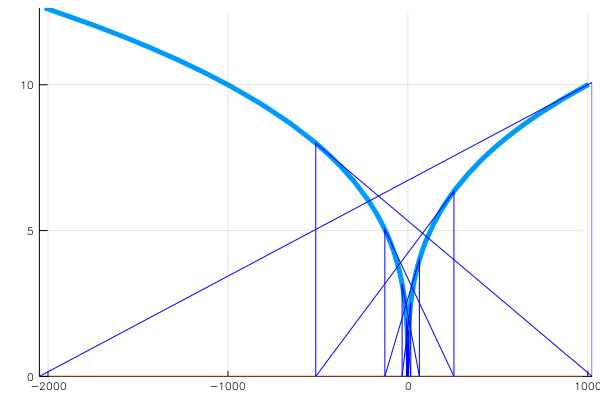

In [ ]:
f(x) = (abs(x))^(1/3)
show_newton(f, 1.0, 10)

<ul>
<li><p>First derivative is $0$: What happens when we start at $0$?</p>
</li>
</ul>

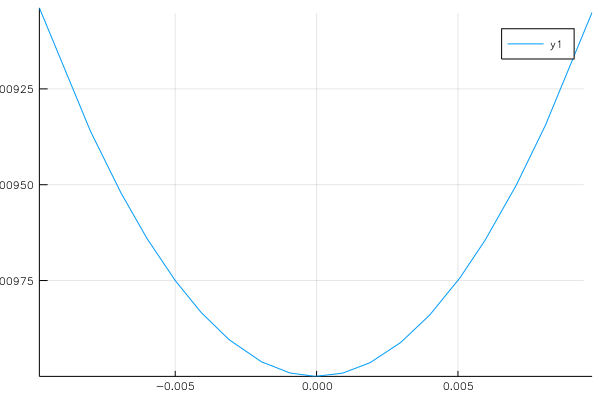

In [ ]:
f(x) = x^2 - .001
plot(f, -.01, .01)